### Wine dataset

In [1]:
#Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from clusteval import clusteval

In [2]:
#Import the data
df = pd.read_csv(r'D:\360digi\DS\Sharath\Dimension_Reduction_PCA\handson\Datasets_PCA_Problem Statement\wine.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
# Type is the identity for the wine category. We can ignore the Type column for further analysis. (Nominal data)

In [5]:
df1 = df.iloc[:,1:]
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# Checking for duplicates
duplicate = df1.duplicated()
print(duplicate)
sum(duplicate) # no duplicate records

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool


0

In [7]:
# Check for missing values
df1.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


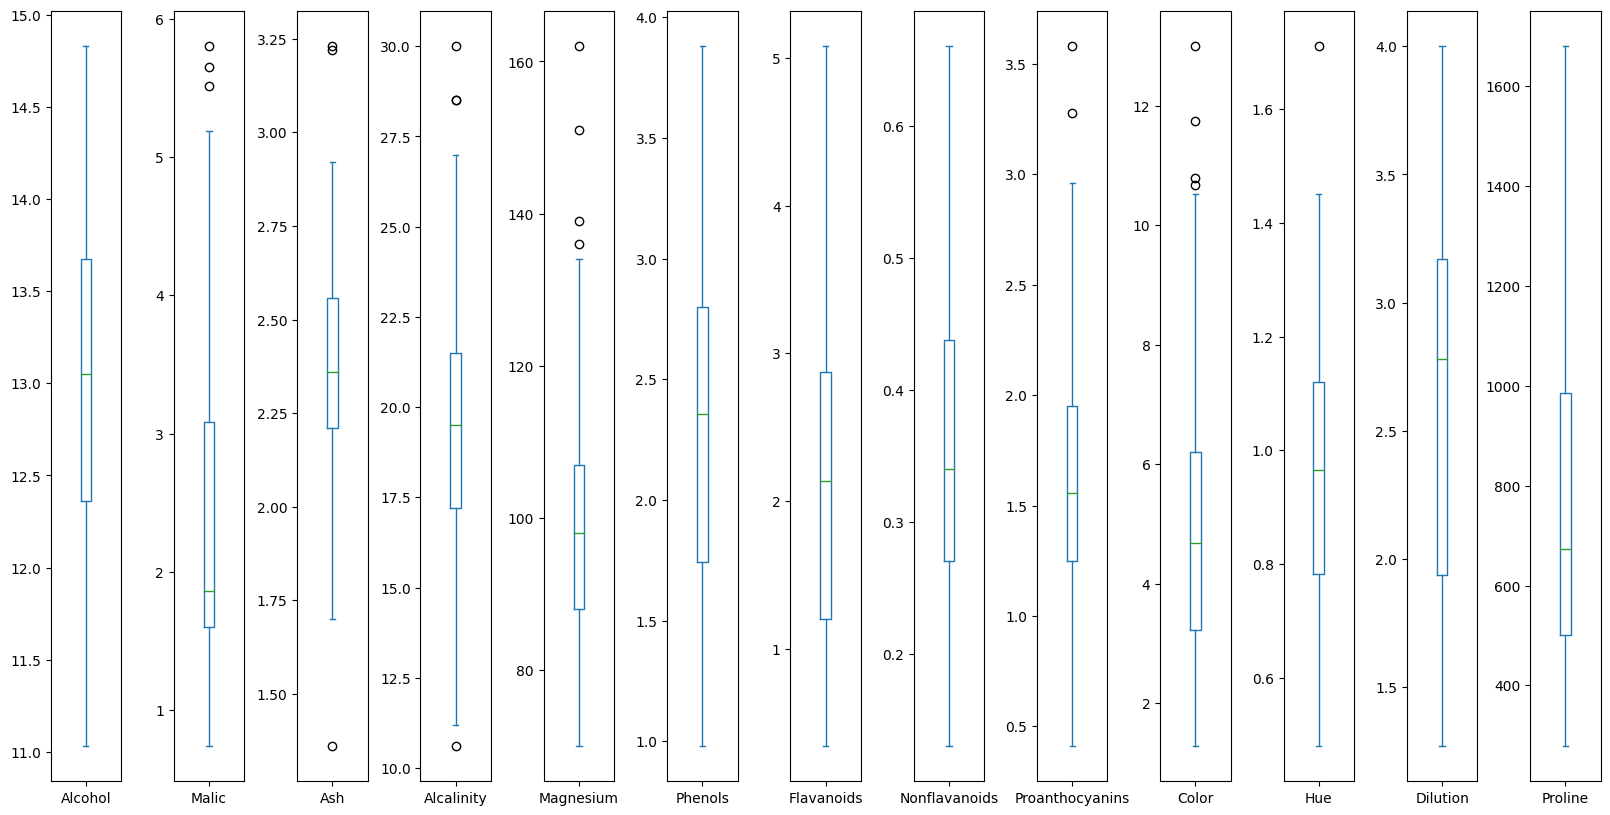

In [9]:
# Box plot visualization to check for outliers

df1.plot(kind = 'box', subplots = True, sharey = False, figsize = (20,10))
plt.subplots_adjust(wspace = 0.75)
plt.show()

# Malic, Ash, Alcalinity, Magnesium, Proanthocyanins, Color, Hue coulmns have outliers.   

#### Winsorization

In [10]:
# Winsorization for "Malic" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Malic'])

df1['Malic'] = winsor.fit_transform(df1[['Malic']])

In [11]:
# Winsorization for "Ash" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Ash'])

df1['Ash'] = winsor.fit_transform(df1[['Ash']])

In [12]:
# Winsorization for "Alcalinity" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Alcalinity'])

df1['Alcalinity'] = winsor.fit_transform(df1[['Alcalinity']])

In [13]:
# Winsorization for "Magnesium" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Magnesium'])

df1['Magnesium'] = winsor.fit_transform(df1[['Magnesium']])

In [14]:
# Winsorization for "Proanthocyanins" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Proanthocyanins'])

df1['Proanthocyanins'] = winsor.fit_transform(df1[['Proanthocyanins']])

In [15]:
# Winsorization for "Color" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Color'])

df1['Color'] = winsor.fit_transform(df1[['Color']])

In [16]:
# Winsorization for "Hue" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Hue'])

df1['Hue'] = winsor.fit_transform(df1[['Hue']])

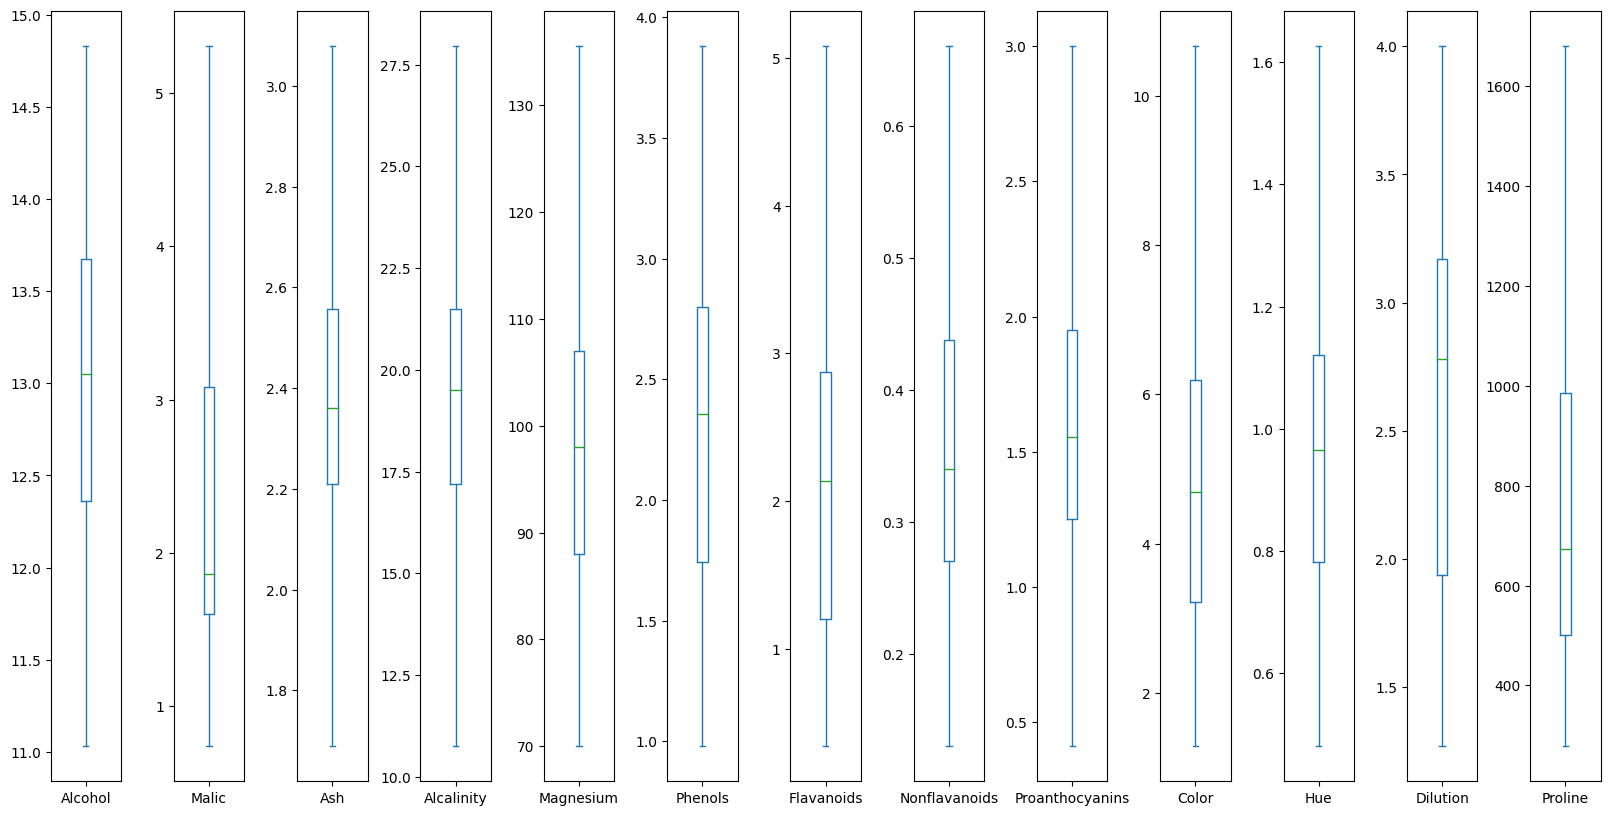

In [17]:
#Box plot visualization to view after the removal of outliers.

df1.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 10))

plt.subplots_adjust(wspace = 0.75)
plt.show()

In [18]:
df1.var()

Alcohol                0.659062
Malic                  1.210381
Ash                    0.069540
Alcalinity            10.809348
Magnesium            179.940392
Phenols                0.391690
Flavanoids             0.997719
Nonflavanoids          0.015489
Proanthocyanins        0.311535
Color                  5.111581
Hue                    0.051572
Dilution               0.504086
Proline            99166.717355
dtype: float64

### Normalization

In [19]:
pipe1 = make_pipeline(MinMaxScaler())

In [20]:
df_norm = pd.DataFrame(pipe1.fit_transform(df1), columns = df1.columns, index = df1.index)
df_norm.head() 

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.212603,0.533273,0.281977,0.870229,0.627586,0.573840,0.283019,0.725869,0.464324,0.488550,0.970696,0.561341
1,0.571053,0.227945,0.324640,0.026163,0.458015,0.575862,0.510549,0.245283,0.335907,0.330138,0.497274,0.780220,0.550642
2,0.560526,0.355068,0.705935,0.456395,0.473282,0.627586,0.611814,0.320755,0.926641,0.468584,0.479826,0.695971,0.646933
3,0.878947,0.265205,0.583633,0.351744,0.656489,0.989655,0.664557,0.207547,0.683398,0.694356,0.331516,0.798535,0.857347
4,0.581579,0.405479,0.849820,0.595930,0.732824,0.627586,0.495781,0.490566,0.544402,0.323749,0.488550,0.608059,0.325963


In [21]:
df_norm.describe() # scale is normalized to min = 0; max = 1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.348589,0.487749,0.507447,0.450124,0.453487,0.356386,0.437460,0.454080,0.400229,0.416121,0.491460,0.334446
std,0.213639,0.241134,0.189716,0.191149,0.204797,0.215811,0.210730,0.234818,0.215503,0.240775,0.198120,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.189041,0.375000,0.375000,0.274809,0.262931,0.182489,0.264151,0.324324,0.206603,0.263904,0.244505,0.158702
50%,0.531579,0.246575,0.482914,0.508721,0.427481,0.474138,0.378692,0.396226,0.442085,0.363152,0.423119,0.553114,0.282097
75%,0.696711,0.513425,0.625000,0.625000,0.564885,0.627586,0.534810,0.580189,0.594595,0.523962,0.558342,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Clustering Model Building

### Hierarchical Clustering - Agglomerative Clustering

In [22]:
%matplotlib inline

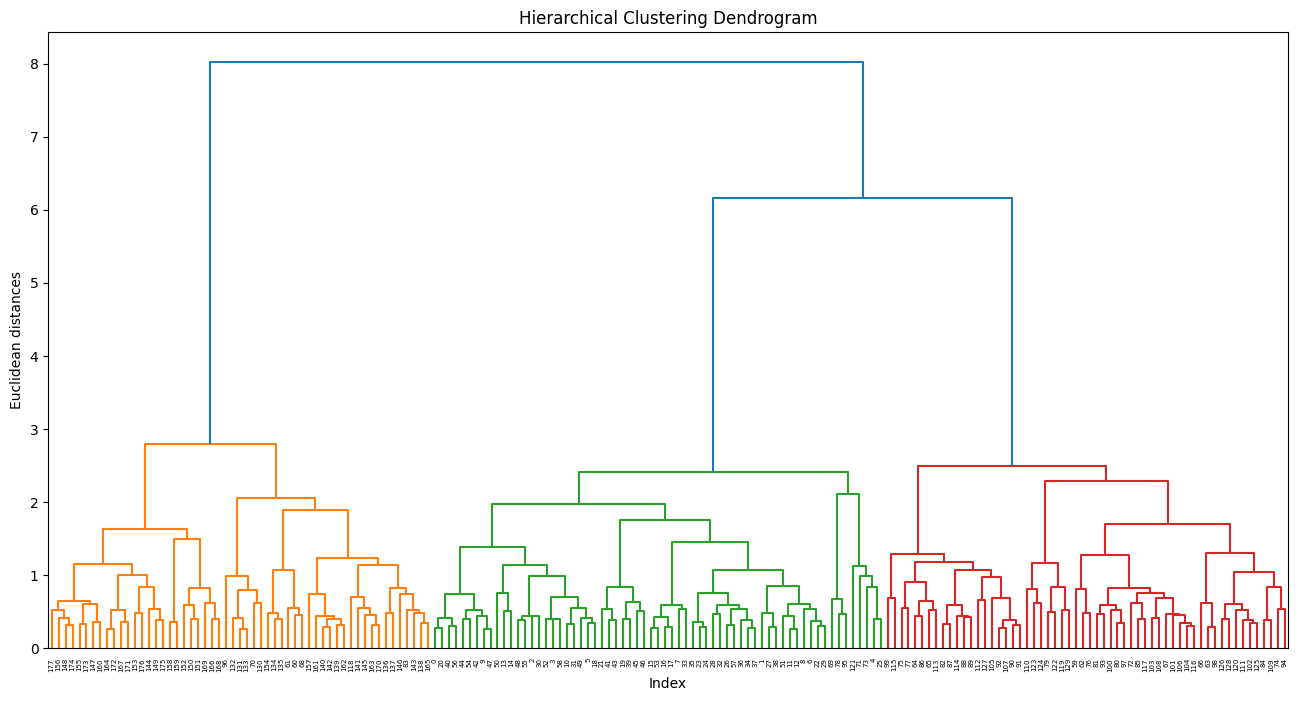

In [23]:
plt.figure(1, figsize = (16,8))
tree_plot = dendrogram(linkage(df_norm, method = "ward"))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

In [24]:
# Applying Agglomerative Clustering choosing 3 as clusters from the above dendrogram
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')

y_hc1 = hc1.fit_predict(df_norm)
y_hc1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [25]:
#average linkage
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')

y_hc2 = hc2.fit_predict(df_norm)
y_hc2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [26]:
#single linkage
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')

y_hc3 = hc3.fit_predict(df_norm)
y_hc3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [27]:
# ward's
hc4 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

y_hc4 = hc4.fit_predict(df_norm)
y_hc4

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [28]:
# Add cluster labels to original Dataset
cluster_labels = pd.Series(hc1.labels_)
df1['cluster'] = cluster_labels
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [29]:
#Silhouette cluster evaluation.
ce = clusteval(evaluate='silhouette')

In [30]:
df_array = np.array(df_norm)


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|█████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 440.67it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


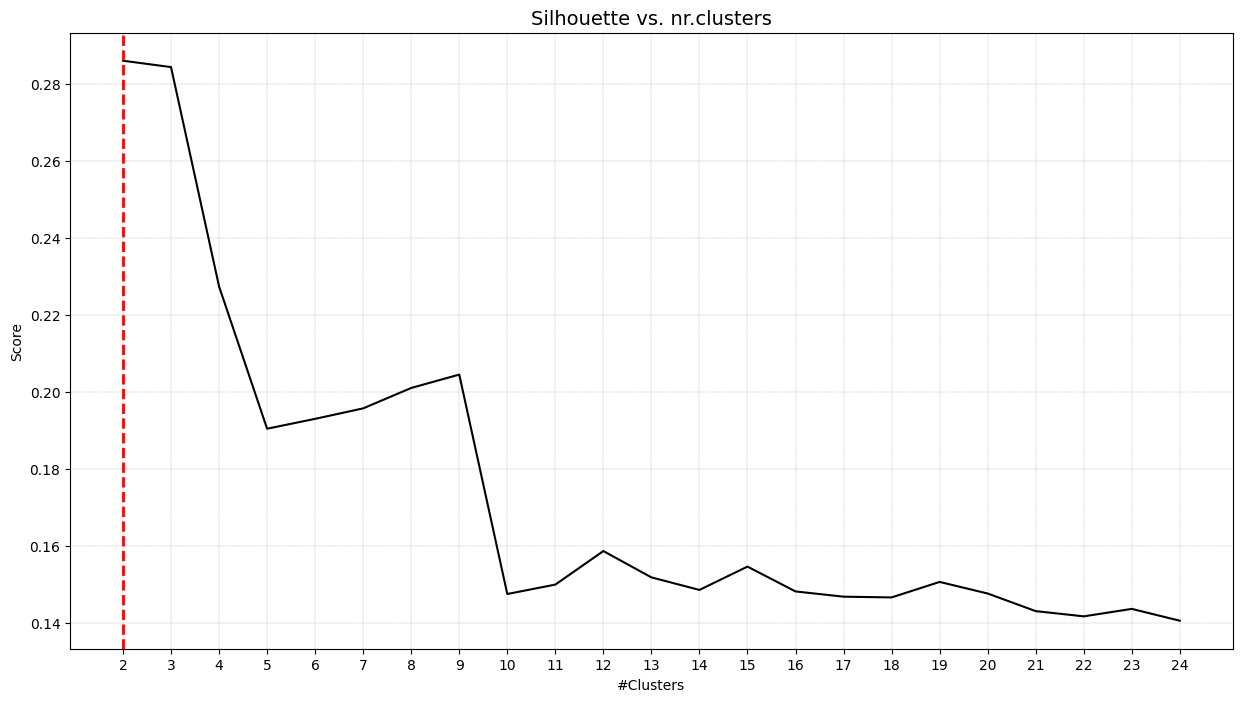

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [31]:
#Fit
ce.fit(df_array)

ce.plot()

In [ ]:
## Using the report from clusteval library building 2 clusters
# Fit using agglomerative with metric: euclidean, and linkage: ward

In [32]:
# Applying AgglomerativeClustering with = 2 as clusters
hc_2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

y_hc_2 = hc_2.fit_predict(df_norm)
y_hc_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [33]:
hc_2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [34]:
# Add cluster labels to original Dataset
cluster_labels = pd.Series(hc_2.labels_)
df1['cluster_hc'] = cluster_labels
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster,cluster_hc
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0


In [35]:
# Aggregate using mean of each cluster
df1.iloc[:,1:].groupby(df1.cluster_hc).mean()

,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster,cluster_hc
cluster_hc,,,,,,,,,,,,,,
0,1.958801,2.344604,18.771545,99.414634,2.563984,2.561382,0.322520,1.788862,4.222602,1.064441,3.013577,800.406504,0.146341,0.0
1,3.161545,2.416182,21.058182,99.636364,1.693818,0.839273,0.449818,1.132545,6.862000,0.716655,1.712909,627.218182,1.090909,1.0


## KMeans 

In [36]:
## scree plot or elbow curve
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[77.44557461653886,
 58.92147129250145,
 54.211900914455825,
 51.09943359020718,
 48.73338905728388,
 45.81179728221539,
 43.80413541234091]

Text(0, 0.5, 'total_within_SS')

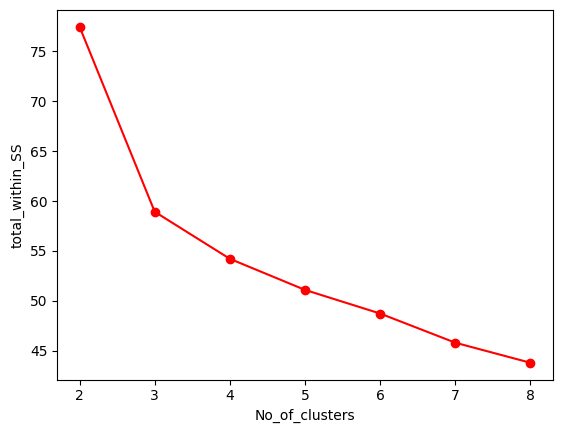

In [37]:
# Creating a scree plot to find out no.of cluster
plt.plot(k, TWSS, 'ro-');
plt.xlabel("No_of_clusters");
plt.ylabel("total_within_SS")

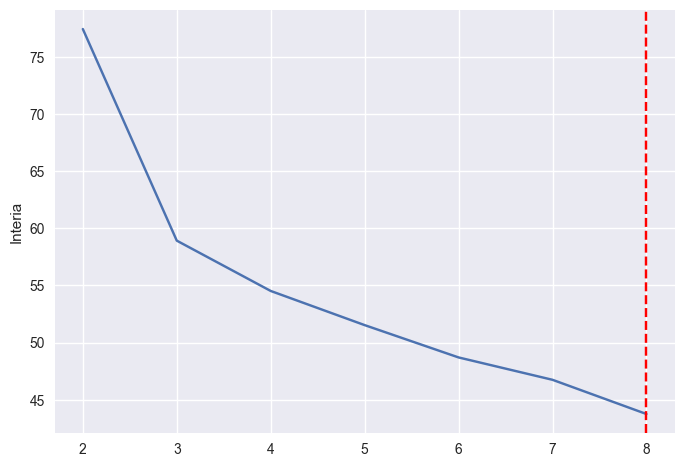

In [38]:
# Using kneeLocator
List = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters = k, init = "random", max_iter = 30, random_state = 1, n_init = 10) 
    kmeans.fit(df_norm)
    List.append(kmeans.inertia_)


from kneed import KneeLocator
kl = KneeLocator(range(2, 9), List, curve = 'convex') 
kl.elbow
plt.style.use("seaborn")
plt.plot(range(2, 9), List)
plt.xticks(range(2, 9))
plt.ylabel("Interia")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show()

In [ ]:
# Detecting the best k=3 using TWSS value from scree plot

In [39]:
model = KMeans(n_clusters = 3)
yy = model.fit(df_norm)

In [40]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [41]:
mb = pd.Series(model.labels_)

In [42]:
df1['clust_k'] = mb

In [43]:
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster,cluster_hc,clust_k
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0,1


In [44]:
# Evaluation of Number of Clusters using Silhouette Coefficient Technique

In [45]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = "random", random_state = 1)
    kmeans.fit(df_norm)
    score = silhouette_score(df_norm, kmeans.labels_)
    k = k
    Sil_coff = score
    silhouette_coefficients.append([k, Sil_coff])

In [46]:
silhouette_coefficients

[[2, 0.2821490224439632],
 [3, 0.2910061273527269],
 [4, 0.2475528217706103],
 [5, 0.20889463412849607],
 [6, 0.219153406137812],
 [7, 0.13350146257381793],
 [8, 0.14006801554325313],
 [9, 0.14277494729159784],
 [10, 0.14847056067778586]]

In [ ]:
# Silhouette Coeffficients shows, the number of clusters k = 3 as the best value

In [47]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    float64
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


## Dimension Reduction with PCA

In [48]:
# Define PCA model
pca = PCA(n_components = 13)

In [49]:
num_pipeline = make_pipeline(pca)

In [50]:
# Pass the raw data through pipeline

processed = num_pipeline.fit(df_norm) 
processed

Pipeline(steps=[('pca', PCA(n_components=13))])

In [51]:
# Apply the pipeline on the dataset
df_pca = pd.DataFrame(processed.transform(df_norm))

df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.742378,-0.334163,0.020734,0.000091,0.104069,-0.080453,0.146934,0.073317,0.283081,-0.147618,0.015088,-0.092323,-0.014517
1,-0.488848,0.022596,-0.370533,0.079290,-0.063275,-0.241465,0.003607,0.193375,-0.069821,-0.098851,0.001467,-0.097102,0.003301
2,-0.547607,-0.244359,0.236458,0.054619,-0.084025,0.146042,0.091632,-0.178455,-0.150749,-0.112471,-0.055385,-0.087528,0.005045
3,-0.809298,-0.656370,0.026831,0.060497,-0.077991,0.042566,-0.082563,0.143534,-0.053878,-0.075791,-0.005911,0.148442,-0.076966
4,-0.215145,-0.140491,0.412441,-0.135035,0.125411,-0.089670,0.078410,0.076538,0.047854,0.075597,-0.098150,-0.059302,-0.015295
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.786732,-0.462235,0.087226,0.254633,-0.185657,-0.207433,0.089753,-0.015801,-0.021389,0.028615,0.041426,-0.007217,-0.028835
174,0.615840,-0.375012,0.082860,0.082095,0.043235,0.015413,0.032731,-0.117485,-0.026697,0.042003,0.002265,0.078341,-0.041055
175,0.660609,-0.646822,-0.103811,0.156580,0.176214,0.068102,0.206661,0.055473,-0.006434,-0.044779,0.199281,-0.007850,0.002025
176,0.578141,-0.514182,-0.108413,-0.178122,0.106227,0.189895,0.209634,0.103679,0.068205,-0.150573,0.073307,0.012480,-0.012199


In [52]:
# PCA weights

processed['pca'].components_

array([[-1.18091114e-01,  2.74415847e-01,  7.40307507e-03,
         1.96772575e-01, -1.15212841e-01, -3.77175811e-01,
        -3.98130002e-01,  3.18270927e-01, -3.02103788e-01,
         1.19736810e-01, -2.67009727e-01, -4.55227213e-01,
        -2.69271415e-01],
       [-4.76549491e-01, -2.18500375e-01, -2.28843679e-01,
         5.92760485e-02, -2.87837691e-01, -8.66338531e-02,
        -2.32960518e-02,  7.11639433e-03, -5.84302386e-02,
        -5.82398139e-01,  2.21298091e-01,  1.73650285e-01,
        -3.95723170e-01],
       [-1.39603985e-01,  3.40630734e-01,  5.56014575e-01,
         5.38432724e-01,  9.96953496e-02,  1.88781623e-01,
         1.61223380e-01,  2.38596698e-01,  2.08333199e-01,
        -1.21874291e-01, -1.76340137e-02,  2.46252446e-01,
        -1.33090602e-01],
       [ 1.77859685e-02,  6.51591889e-01, -3.32226358e-01,
        -1.06607882e-01, -1.99647269e-01,  5.68924239e-02,
         4.89992533e-02, -4.15945041e-01,  2.07908136e-01,
        -1.74222127e-02, -3.43505055e

In [53]:
# Take a closer look at the components
components = pd.DataFrame(processed['pca'].components_, columns = df_norm.columns).T
components.columns = ['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12']

components

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
Alcohol,-0.118091,-0.476549,-0.139604,0.017786,-0.237740,-0.256899,-0.158223,-0.229122,0.620278,0.239610,-0.281765,0.128944,0.030410
Malic,0.274416,-0.218500,0.340631,0.651592,-0.083105,-0.398069,0.268554,-0.054875,-0.186570,0.173224,0.167825,-0.052171,0.012344
Ash,0.007403,-0.228844,0.556015,-0.332226,0.094331,-0.138653,-0.252688,-0.048859,-0.209525,-0.019493,-0.390444,-0.467161,-0.136824
Alcalinity,0.196773,0.059276,0.538433,-0.106608,0.160587,0.180182,-0.320857,-0.310336,0.161419,0.025957,0.302738,0.520723,0.097203
Magnesium,-0.115213,-0.287838,0.099695,-0.199647,0.678146,-0.102619,0.484194,0.261914,0.253210,-0.007639,0.097432,0.069911,0.045482
Phenols,-0.377176,-0.086634,0.188782,0.056892,-0.163755,0.129587,-0.047236,0.467159,-0.185891,0.372472,-0.079936,0.395170,-0.459826
Flavanoids,-0.398130,-0.023296,0.161223,0.048999,-0.097636,0.083598,-0.055515,0.176547,-0.135511,0.200625,-0.031257,-0.037471,0.837131
Nonflavanoids,0.318271,0.007116,0.238597,-0.415945,-0.593655,0.000777,0.435622,0.260808,0.162373,-0.128683,0.042666,0.067025,0.096245
Proanthocyanins,-0.302104,-0.058430,0.208333,0.207908,-0.090810,0.576534,0.448912,-0.448856,0.077432,-0.107319,-0.182320,-0.105689,-0.114614
Color,0.119737,-0.582398,-0.121874,-0.017422,-0.089005,0.423270,-0.206204,0.140413,-0.022282,0.047522,0.528256,-0.313992,-0.040033


In [54]:
print(processed['pca'].explained_variance_ratio_)

[0.37752763 0.20073531 0.0911699  0.07275951 0.06155731 0.05159613
 0.03968108 0.0255     0.02181212 0.02026372 0.0154215  0.01439521
 0.00758059]


In [55]:
var1 = np.cumsum(processed['pca'].explained_variance_ratio_)

print(var1)

[0.37752763 0.57826294 0.66943284 0.74219235 0.80374965 0.85534578
 0.89502686 0.92052686 0.94233898 0.96260271 0.97802421 0.99241941
 1.        ]


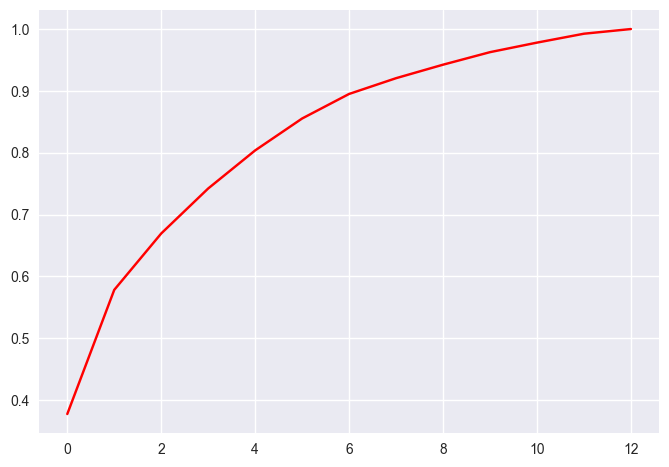

In [56]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

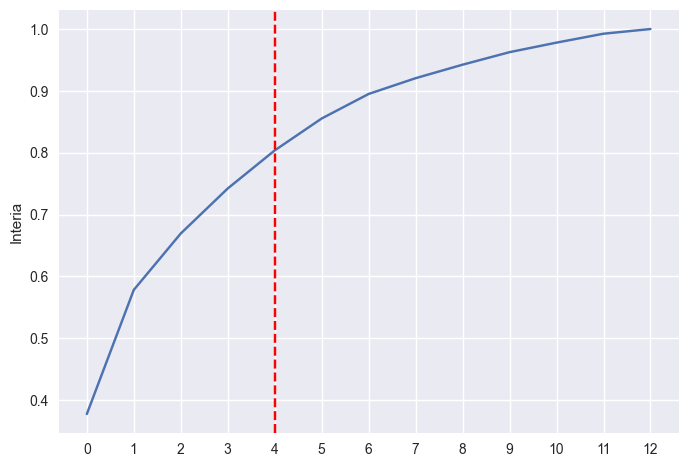

In [57]:
# knee Locator
# from kneed import KneeLocator
kl = KneeLocator(range(len(var1)), var1, curve = 'concave', direction = "increasing") 
# The line is pretty linear hence Kneelocator is not able to detect the knee/elbow appropriately
kl.elbow
plt.style.use("seaborn")
plt.plot(range(len(var1)), var1)
plt.xticks(range(len(var1)))
plt.ylabel("Interia")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show()

In [ ]:
# Kneelocator recommends 5 PCs as the ideal number of features to be considered

In [ ]:
# PCA for Feature Extraction (We consider 3 PCs)

In [58]:
# Final dataset with manageable number of columns (Feature Extraction)

final = pd.concat([df.Type, df_pca.iloc[:, 0:3]], axis = 1)
final.columns = ['Type', 'pc0', 'pc1', 'pc2']
final

,Type,pc0,pc1,pc2
0,1,-0.742378,-0.334163,0.020734
1,1,-0.488848,0.022596,-0.370533
2,1,-0.547607,-0.244359,0.236458
3,1,-0.809298,-0.656370,0.026831
4,1,-0.215145,-0.140491,0.412441
...,...,...,...,...
173,3,0.786732,-0.462235,0.087226
174,3,0.615840,-0.375012,0.082860
175,3,0.660609,-0.646822,-0.103811
176,3,0.578141,-0.514182,-0.108413


0      Text(-0.7423780936631127, -0.3341632954886843,...
1      Text(-0.4888480261459006, 0.02259572401363831,...
2      Text(-0.5476071532217971, -0.24435906607568922...
3      Text(-0.8092983103617319, -0.6563703950831916,...
4      Text(-0.2151454250992463, -0.1404910818997989,...
                             ...                        
173    Text(0.7867322179086971, -0.4622352157841536, ...
174    Text(0.615840365962352, -0.37501226472719057, ...
175    Text(0.6606089013458478, -0.6468222262639475, ...
176    Text(0.5781414379852501, -0.5141818586907828, ...
177    Text(0.7604055919793594, -0.5703934164815062, ...
Length: 178, dtype: object

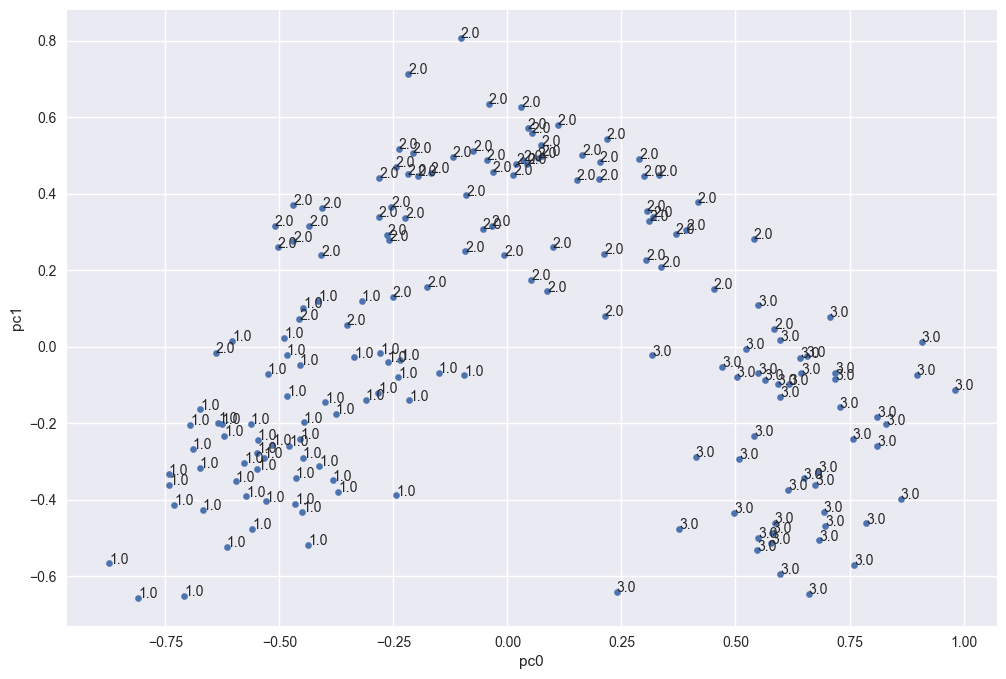

In [59]:
# Scatter diagram
ax = final.plot(x = 'pc0', y = 'pc1', kind = 'scatter', figsize = (12, 8))
final[['pc0', 'pc1', 'Type']].apply(lambda x: ax.text(*x), axis = 1)

In [60]:
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.742378,-0.334163,0.020734,0.000091,0.104069,-0.080453,0.146934,0.073317,0.283081,-0.147618,0.015088,-0.092323,-0.014517
1,-0.488848,0.022596,-0.370533,0.079290,-0.063275,-0.241465,0.003607,0.193375,-0.069821,-0.098851,0.001467,-0.097102,0.003301
2,-0.547607,-0.244359,0.236458,0.054619,-0.084025,0.146042,0.091632,-0.178455,-0.150749,-0.112471,-0.055385,-0.087528,0.005045
3,-0.809298,-0.656370,0.026831,0.060497,-0.077991,0.042566,-0.082563,0.143534,-0.053878,-0.075791,-0.005911,0.148442,-0.076966
4,-0.215145,-0.140491,0.412441,-0.135035,0.125411,-0.089670,0.078410,0.076538,0.047854,0.075597,-0.098150,-0.059302,-0.015295
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.786732,-0.462235,0.087226,0.254633,-0.185657,-0.207433,0.089753,-0.015801,-0.021389,0.028615,0.041426,-0.007217,-0.028835
174,0.615840,-0.375012,0.082860,0.082095,0.043235,0.015413,0.032731,-0.117485,-0.026697,0.042003,0.002265,0.078341,-0.041055
175,0.660609,-0.646822,-0.103811,0.156580,0.176214,0.068102,0.206661,0.055473,-0.006434,-0.044779,0.199281,-0.007850,0.002025
176,0.578141,-0.514182,-0.108413,-0.178122,0.106227,0.189895,0.209634,0.103679,0.068205,-0.150573,0.073307,0.012480,-0.012199


In [61]:
df_res = df_pca.iloc[:, 0:3]
df_res.columns = ['pc0', 'pc1', 'pc2']
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc0     178 non-null    float64
 1   pc1     178 non-null    float64
 2   pc2     178 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


## Hirerarchical Clustering with PCA dataset

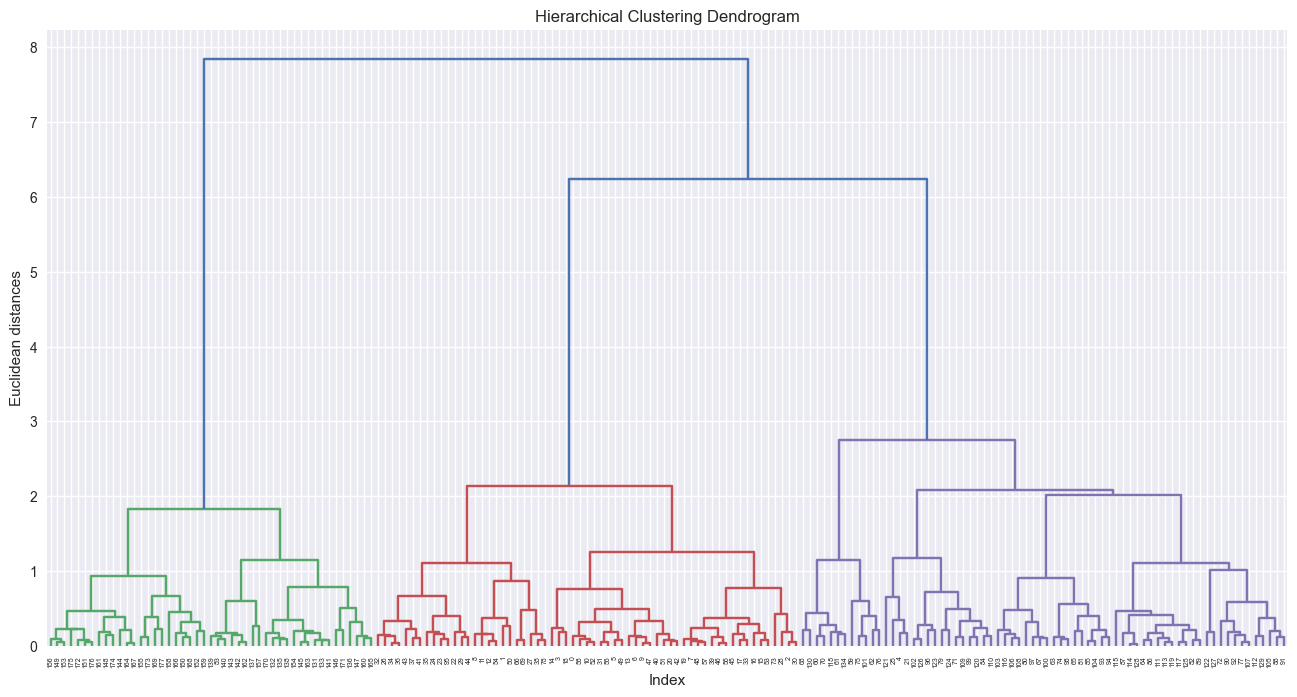

In [62]:
plt.figure(1, figsize = (16, 8))
tree_plot = dendrogram(linkage(df_res, method = "ward"))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

In [63]:
# Applying Agglomerative Clustering choosing 3 as clusters from the above dendrogram
hc_pc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')

y_hc_pc1 = hc_pc1.fit_predict(df_res)
y_hc_pc1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [64]:
np.unique(y_hc_pc1)

array([0, 1, 2], dtype=int64)

In [65]:
#average linkage
hc_pc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')

y_hc_pc2 = hc_pc2.fit_predict(df_res)
y_hc_pc2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 2, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [66]:
#single linkage
hc_pc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')

y_hc_pc3 = hc_pc3.fit_predict(df_res)
y_hc_pc3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [67]:
# ward
hc_pc4 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

y_hc_pc4 = hc_pc4.fit_predict(df_res)
y_hc_pc4

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [68]:
hc_pc1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [69]:
clust_labels = pd.Series(hc_pc1.labels_)

In [70]:
# Add cluster labels to original Dataset
df1['clust_hc_pca'] = clust_labels
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster,cluster_hc,clust_k,clust_hc_pca
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,0,1,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0,1,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0,1,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0,1,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0,1,2


In [71]:
# cluster evaluation

In [72]:
#Silhouette cluster evaluation.
ce = clusteval(evaluate='silhouette')

In [73]:
df_array = np.array(df_res)


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|█████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 488.04it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [3].
[clusteval] >Fin.


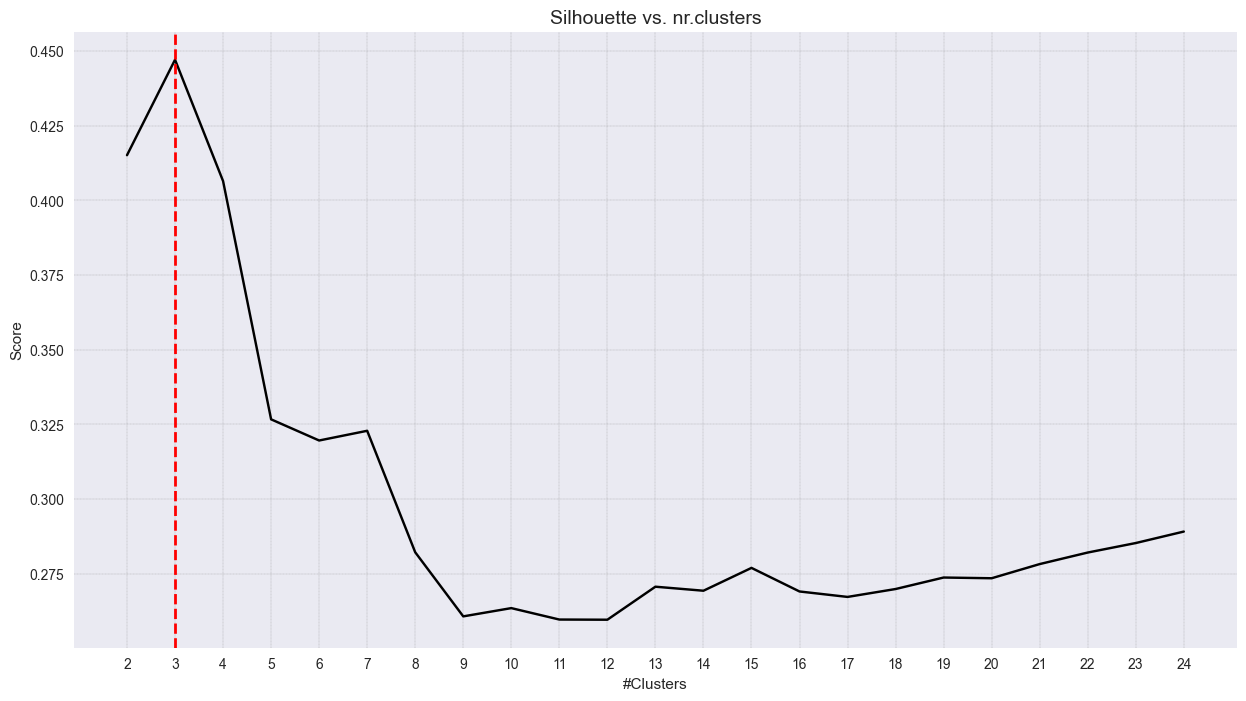

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [74]:
#Fit
ce.fit(df_array)

ce.plot()

In [ ]:
## Using the report from clusteval library building 3 clusters is ideal option.


## KMeans Clustering using PCA dataset

In [75]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_res)
    TWSS.append(kmeans.inertia_)

TWSS

[40.87104034217199,
 22.762541944476485,
 19.183325605201578,
 16.62763967141004,
 14.222356922715818,
 12.643319746717658,
 11.4931539081784]

Text(0, 0.5, 'total_within_SS')

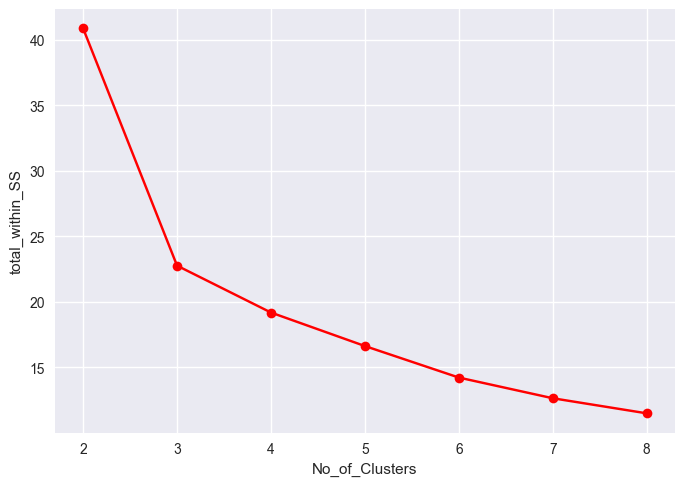

In [76]:
# Creating a scree plot to find out no.of cluster
plt.plot(k, TWSS, 'ro-'); plt.xlabel("No_of_Clusters"); plt.ylabel("total_within_SS")

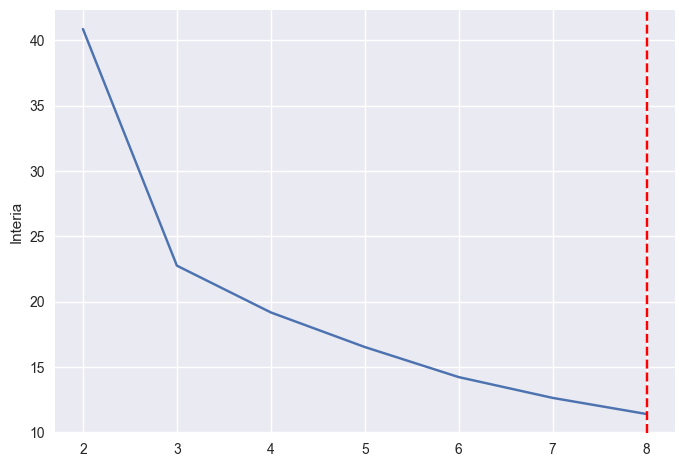

In [77]:
# Using KneeLocator
List = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters = k, init = "random", max_iter = 30, random_state = 1, n_init = 10) 
    kmeans.fit(df_res)
    List.append(kmeans.inertia_)

from kneed import KneeLocator
kl = KneeLocator(range(2, 9), List, curve = 'convex') 
kl.elbow
plt.style.use("seaborn")
plt.plot(range(2, 9), List)
plt.xticks(range(2, 9))
plt.ylabel("Interia")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show()

In [78]:
# Detecting the best k=3 using TWSS value from scree plot

In [79]:
model1 = KMeans(n_clusters = 3)
yy = model1.fit(df_res)

In [80]:
model1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [81]:
mb = pd.Series(model1.labels_) 

In [82]:
df1['clust_k_pca'] = mb # creating a  new column and assigning it to new column 

In [83]:
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster,cluster_hc,clust_k,clust_hc_pca,clust_k_pca
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,0,1,2,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0,1,2,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0,1,2,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0,1,2,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0,1,2,1


In [84]:
# Evaluation of Number of Clusters using Silhouette Coefficient Technique

In [85]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range (2, 11):
    kmeans = KMeans(n_clusters = k, init = "random", random_state = 1)
    kmeans.fit(df_res)
    score = silhouette_score(df_res, kmeans.labels_)
    k = k
    Sil_coff = score
    silhouette_coefficients.append([k, Sil_coff])

In [86]:
silhouette_coefficients

[[2, 0.4202386243494858],
 [3, 0.4647531692094244],
 [4, 0.38361196580458334],
 [5, 0.3798558259082487],
 [6, 0.3299154505065768],
 [7, 0.3087419280989608],
 [8, 0.2979372545170746],
 [9, 0.29060800278751947],
 [10, 0.29053498583509085]]

In [ ]:
# Silhouette Coeffficients shows, the number of clusters k = 3 as the best value